# Getting census data

## Lecture objectives

1. Gain more experience with APIs and `requests`
2. Learn specialized ways to access census data
3. Pratice with `pandas`, `geopandas`, and plotting


Traditionally, if you wanted census data, you had to download .csv or other files and decipher them. Recently, the census has introduced an API. [See the documentation here](https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html).

If you request more than 500 queries a day, you'll need to register for a (free) [API key](https://www.census.gov/data/developers/guidance/api-user-guide.Help_&_Contact_Us.html) from the Census Bureau.

Let's download population by county from the 2015 American Community Survey five-year estimates. We see from the documentation that the API call takes the following form:

`https://api.census.gov/data/YEAR/acs/DATASET?get=TABLENAME&for=GEOGRAPHY`

So getting the population (variable `B01001_001E`) for all counties is:

`https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=county`

Try this in your browser.

Now let's get it into Python.

In [1]:
import requests
r = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=county')
type(r.text)
# This time, it looks like the data come in a string
print(r.text)

[["B00001_001E","state","county"],
["592","48","075"],
["7108","48","091"],
["2401","48","225"],
["5409","48","349"],
["1502","48","415"],
["310","48","433"],
["3732","48","021"],
["3087","48","025"],
["559","48","103"],
["9178","50","021"],
["5512","50","017"],
["7259","50","027"],
["1806","72","077"],
["1532","72","001"],
["1343","72","067"],
["1539","72","105"],
["6138","72","013"],
["518","72","054"],
["1858","72","099"],
["1834","72","123"],
["2442","72","153"],
["2454","72","023"],
["774","72","083"],
["1805","72","149"],
["2328","72","003"],
["2938","72","041"],
["1344","72","089"],
["1600","72","107"],
["1320","48","455"],
["1418","48","019"],
["803","72","037"],
["2269","72","071"],
["1833","72","085"],
["2362","72","143"],
["15052","42","111"],
["1309","29","123"],
["2760","29","217"],
["4131","29","147"],
["1737","29","041"],
["1457","29","223"],
["4126","29","201"],
["1914","29","011"],
["1224","29","039"],
["2243","29","073"],
["2767","29","121"],
["1393","29","149"],
["16

In [2]:
# But turns out that it's actually a JSON
censusdata = r.json()
type(censusdata)

list

In [3]:
# The JSON format is a list of lists. The first sublist is the column headers
censusdata[:5] # show the first five rows

[['B00001_001E', 'state', 'county'],
 ['592', '48', '075'],
 ['7108', '48', '091'],
 ['2401', '48', '225'],
 ['5409', '48', '349']]

In [4]:
# So we can also convert this to a pandas dataframe, if we use the first list as the column names
# Note that the state and county are shown by their FIPS codes
import pandas as pd
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df

,B00001_001E,state,county
0,592,48,075
1,7108,48,091
2,2401,48,225
3,5409,48,349
4,1502,48,415
...,...,...,...
3215,1401,51,037
3216,1465,48,051
3217,1328,51,081
3218,17694,53,067


Let's rename the column to something more meaningful. `pandas` has a helpful `rename` function.

In [5]:
df.rename?

In [6]:
# note the inplace keyword changes the dataframe in place, rather than returning a copy
df.rename(columns = {'B01001_001E':'population'}, inplace=True)
df

,population,state,county
0,592,48,075
1,7108,48,091
2,2401,48,225
3,5409,48,349
4,1502,48,415
...,...,...,...
3215,1401,51,037
3216,1465,48,051
3217,1328,51,081
3218,17694,53,067


### Using cenpy
It turns out that there is an easier way to get the census data. Rather than using the Census API, we can call it through the `cenpy` package.

In [7]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()

The [online documentation](https://cenpy-devs.github.io/cenpy/api.html#product-american-community-survey) is helpful in showing the functions that are available. We could also call `help(acs)` or just `acs?`.

The `tables` attribute  seems useful, as do the `filter_tables` and `from_county` functions.

In [8]:
# what tables are available?
acs.tables?

In [9]:
# Let's map the age of the housing stock
# get all the tables that have "BUILT" in their description
acs.filter_tables('BUILT', by='description')

,description,columns
table_name,,
B25034,YEAR STRUCTURE BUILT,"[B25034_001E, B25034_002E, B25034_003E, B25034..."
B25035,MEDIAN YEAR STRUCTURE BUILT,[B25035_001E]
B25036,TENURE BY YEAR STRUCTURE BUILT,"[B25036_001E, B25036_002E, B25036_003E, B25036..."
B25037,MEDIAN YEAR STRUCTURE BUILT BY TENURE,"[B25037_001E, B25037_002E, B25037_003E]"
B25050,PLUMBING FACILITIES BY OCCUPANTS PER ROOM BY Y...,"[B25050_001E, B25050_002E, B25050_003E, B25050..."
B25107,MEDIAN VALUE BY YEAR STRUCTURE BUILT,"[B25107_001E, B25107_002E, B25107_003E, B25107..."
B25108,AGGREGATE VALUE (DOLLARS) BY YEAR STRUCTURE BUILT,"[B25108_001E, B25108_002E, B25108_003E, B25108..."
B25111,MEDIAN GROSS RENT BY YEAR STRUCTURE BUILT,"[B25111_001E, B25111_002E, B25111_003E, B25111..."
B25112,AGGREGATE GROSS RENT (DOLLARS) BY YEAR STRUCTU...,"[B25112_001E, B25112_002E, B25112_003E, B25112..."


In [10]:
# it looks like table B25035 and variable B25035_001E are promising, Let's see what is here in Riverside County
riverside = products.ACS(2017).from_county('Riverside, CA', level='tract',
                                        variables='B25035_001E')

# you might get a bunch of FutureWarnings, but you can ignore these

/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/uds/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [11]:
# It looks like cenpy gives us a geopandas dataframe
type(riverside)

geopandas.geodataframe.GeoDataFrame

In [12]:
riverside.head()

,GEOID,geometry,B25035_001E,NAME,state,county,tract
0,06065041904,"POLYGON ((-13099280.410 4011347.460, -13099235...",1980.0,"Census Tract 419.04, Riverside County, California",06,065,041904
1,06065041806,"POLYGON ((-13090448.870 4008279.130, -13090446...",1995.0,"Census Tract 418.06, Riverside County, California",06,065,041806
2,06065040808,"POLYGON ((-13089707.820 4014799.500, -13089688...",1987.0,"Census Tract 408.08, Riverside County, California",06,065,040808
3,06065046601,"POLYGON ((-13089190.190 4017589.480, -13089189...",1995.0,"Census Tract 466.01, Riverside County, California",06,065,046601
4,06065040816,"POLYGON ((-13084376.060 4015407.040, -13084371...",1995.0,"Census Tract 408.16, Riverside County, California",06,065,040816


In [13]:
# let's rename the census column to something more memorable
riverside.rename(columns={'B25035_001E':'Median year built'}, inplace=True)

In [14]:
riverside.head()

,GEOID,geometry,Median year built,NAME,state,county,tract
0,06065041904,"POLYGON ((-13099280.410 4011347.460, -13099235...",1980.0,"Census Tract 419.04, Riverside County, California",06,065,041904
1,06065041806,"POLYGON ((-13090448.870 4008279.130, -13090446...",1995.0,"Census Tract 418.06, Riverside County, California",06,065,041806
2,06065040808,"POLYGON ((-13089707.820 4014799.500, -13089688...",1987.0,"Census Tract 408.08, Riverside County, California",06,065,040808
3,06065046601,"POLYGON ((-13089190.190 4017589.480, -13089189...",1995.0,"Census Tract 466.01, Riverside County, California",06,065,046601
4,06065040816,"POLYGON ((-13084376.060 4015407.040, -13084371...",1995.0,"Census Tract 408.16, Riverside County, California",06,065,040816


`GEOID` gives the standard census FIPS code, formatted as 2-digit state + 3-digit county + 6 digit tract. Read more about them [here](https://www.policymap.com/2012/08/tips-on-fips-a-quick-guide-to-geographic-place-codes-part-iii/)

`cenpy` also returns the geographic boundaries of each census tract as a polygon. This is helpful! And it means that we can plot the data pretty simply.

Here, we use the standard `geopandas` plotting function. We tell it to plot the `Median year built` column, on the `ax` object that we just created.

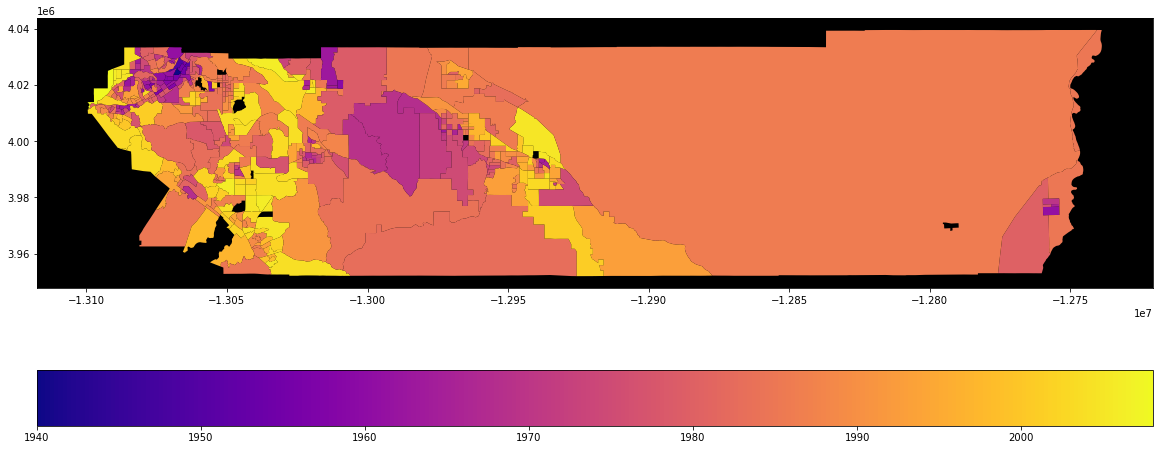

In [16]:
import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(1,1,figsize=(20,10))

riverside.plot('Median year built', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})
ax.set_facecolor('k')

There is much that we could do to improve this map, but let's save that for another time. In general, the best course is to follow the numerous examples for `geopandas` that you'll find online.

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>Getting census data is one of the most common tasks you'll do in this course.</li>
  <li>The Census Bureau has a well-documented API, that may be useful for more specialized queries.</li>
  <li>For simple queries, cenpy is a good alternative.</li>
</ul>
</div>